In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]

# other constants
lower_percentile = 0.159
upper_percentile = 0.841

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 28,
                     'axes.labelsize': 28,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [33]:
margin=0.1
df = pd.read_csv(f'experiments/M_{margin}_data.csv')
df = df[df['M'] == 256]
sep = 'separable' if margin > 0 else 'overlap'
shots = [4,8,16,32,64,128,256,512,1024,2048,4096, 8192] #list(set(df['R'])) #
shots.sort()

118
(12, 3)
[[1.57542264 7.71053587 2.06037546 1.49965397 0.56657705 1.44440257
  0.92769179 0.60319347 0.19938929 0.31167881 0.43725165 0.11328318]
 [1.57984112 7.76928254 1.98899616 1.55558012 0.57305685 1.40010056
  0.91005513 0.58540765 0.20790863 0.32557335 0.43798029 0.11006384]]
[-1.78660459  8.93631907]
118
(12, 3)
[[288.10260797 667.54351454 393.7680719  100.04522975 186.43356307
   46.0683833   82.11605811  61.46178856  20.92690271  27.87837392
    4.35060162   6.990676  ]
 [288.61929632 680.72553839 402.95409529 100.91293745 187.17026636
   44.40641207  80.14988689  63.31933558  21.5762705   27.60115323
    4.50997595   7.17923325]]
[-1.16703061 12.67272578]


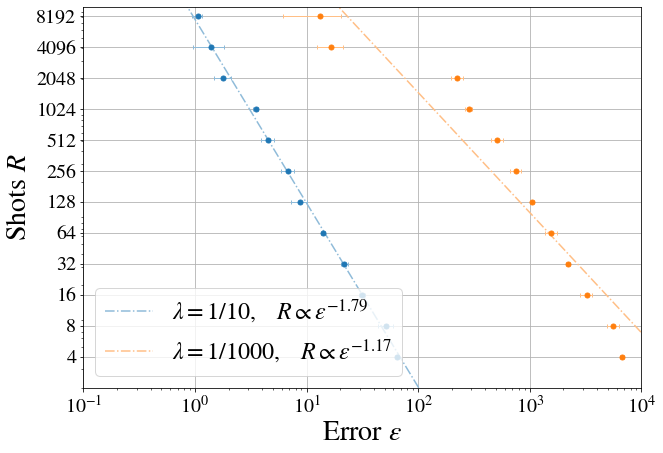

In [34]:
plt.figure(figsize=(10,7))
for i, C in enumerate([10.,1000.]):
    filter = df['C'] == C
    print(np.sum(filter))
    epsilons = np.array([df['epsilon'][(df['R'] == int(R)) & filter ][:3] for R in shots])
    print(epsilons.shape)
    means = np.mean(epsilons,axis=1)
    upper = np.quantile(epsilons, upper_percentile, axis=1)
    lower = np.quantile(epsilons,lower_percentile,axis=1)
    errors = np.array([means - lower, upper - means])
    print(errors)
    plt.errorbar(means,shots,xerr=errors,marker='.',ecolor=colors_light[i],elinewidth=1.,ls='',capsize=2,
        color=colors[i], ms=10)
    #plt.scatter(means,shots,c=colors[i])
    #plt.errorbar(means,shots,xerr=stds,fmt='.')
    plt.xscale('log')
    plt.yscale('log')
    p = np.polyfit(np.log(means),np.log(shots),1)
    print(p)
    efine = np.geomspace(0.0001,1e4,1000)
    plt.plot(efine,np.exp(p[1])*efine**(p[0]),linestyle='-.',label=r'$\lambda = 1/{{%s}},\quad R\propto\varepsilon^{{%.2f}}$'%(int(C),p[0]),color=colors_light[i])

plt.yticks(shots,shots)
plt.xlim(1e-1,1e4)
plt.ylim(2,1e4)
plt.xlabel(r'Error $\varepsilon$')
plt.ylabel(r'Shots $R$')
plt.grid()
plt.legend(loc='lower left')
plt.savefig(f'plots/dual_exponent_{sep}.png',dpi=300,bbox_inches='tight')